In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
print(tf.__version__)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.33

1.5.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14533308898057911443
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14819619636
locality {
  bus_id: 1
}
incarnation: 4552643302349773608
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:09:00.0, compute capability: 7.0"
]


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
tf.set_random_seed(4286)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Creating the Place Holders

X = tf.placeholder(tf.float32, shape = [None, 784])

Y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [7]:
# Defining the Hidden Layers

HL1 = 1024

HL2 = 1024

HL3 = 1024

HL4 = 1024

HL5 = 1024

OL = 10

In [8]:
# Defining the weights and bias for the five layers

W1 = tf.Variable(tf.truncated_normal([784, HL1], stddev=0.1))
b1 = tf.Variable(tf.zeros([HL1]))

W2 = tf.Variable(tf.truncated_normal([HL1, HL2], stddev=0.1))
b2 = tf.Variable(tf.zeros([HL2]))

W3 = tf.Variable(tf.truncated_normal([HL2, HL3], stddev=0.1))
b3 = tf.Variable(tf.zeros([HL3]))

W4 = tf.Variable(tf.truncated_normal([HL3, HL4], stddev=0.1))
b4 = tf.Variable(tf.zeros([HL4]))

W5 = tf.Variable(tf.truncated_normal([HL4, HL5], stddev=0.1))
b5 = tf.Variable(tf.zeros([HL5]))

W6 = tf.Variable(tf.truncated_normal([HL5, OL], stddev=0.1))
b6 = tf.Variable(tf.zeros([OL]))

In [9]:
# Defining the activation function for each layer

L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)

Y_logits = tf.matmul(L5, W6) + b6

Y_pred = tf.nn.softmax(Y_logits)

In [10]:
# Defining the Loss Function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y_logits, labels = Y_true))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [11]:
# Defining the optimizer function

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cross_entropy)

In [12]:
# Calculating accuracy of trained model

matches = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))

In [13]:
# Creating the Session

sess = tf.InteractiveSession(config = config)

In [14]:
# Initializing all the global variables

init = tf.global_variables_initializer()

sess.run(init)

In [15]:
epochs = 20000
    
for i in range(epochs + 1):
    batch_X , batch_Y = mnist.train.next_batch(256)

    sess.run(train, feed_dict={X: batch_X, Y_true: batch_Y})

    if i%5000 == 0:
        acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_true: batch_Y})

        acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_true: mnist.test.labels})

        print("Currently on Iteration # {}".format(i))
        print("Training Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_trn*100, loss_trn*100) )
        print("Test Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_tst*100, loss_tst*100))
        print("\n")

Currently on Iteration # 0
Training Set Accuracy and Loss: Accuracy = 26.953125, Loss = 5904.0618896484375
Test Set Accuracy and Loss: Accuracy = 23.109999299049377, Loss = 5725.975799560547


Currently on Iteration # 5000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.4743174649775028
Test Set Accuracy and Loss: Accuracy = 97.43000268936157, Loss = 12.120690941810608


Currently on Iteration # 10000
Training Set Accuracy and Loss: Accuracy = 99.609375, Loss = 0.7621244993060827
Test Set Accuracy and Loss: Accuracy = 97.85000085830688, Loss = 12.636670470237732


Currently on Iteration # 15000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.022537264158017933
Test Set Accuracy and Loss: Accuracy = 98.14000129699707, Loss = 13.925909996032715


Currently on Iteration # 20000
Training Set Accuracy and Loss: Accuracy = 100.0, Loss = 0.3175668651238084
Test Set Accuracy and Loss: Accuracy = 98.0400025844574, Loss = 18.494760990142822




### Applying SVD to each weight matrix

In [16]:
S1, U1, V1 = tf.svd(W1)
S2, U2, V2 = tf.svd(W2)
S3, U3, V3 = tf.svd(W3)
S4, U4, V4 = tf.svd(W4)
S5, U5, V5 = tf.svd(W5)

### Converting list of singular values into diagonal matrices

In [17]:
S1_diag = tf.diag(S1)
S2_diag = tf.diag(S2)
S3_diag = tf.diag(S3)
S4_diag = tf.diag(S4)
S5_diag = tf.diag(S5)

### Transposing the right singular vector matrix

In [18]:
V1_trans = tf.transpose(V1)
V2_trans = tf.transpose(V2)
V3_trans = tf.transpose(V3)
V4_trans = tf.transpose(V4)
V5_trans = tf.transpose(V5)

### Running the trained model with singular values of different approximation

In [19]:
svd = [10, 20 , 50 , 100, 200, S2_diag.get_shape().as_list()[0]]
Acc = []

for i in svd:
    if i == 1024:
        L1_red = tf.nn.relu(tf.matmul(tf.matmul(mnist.test.images, U1[:, :i]), tf.matmul(S1_diag[:, :], V1_trans[:i, :1024])) + b1)
    else:
        L1_red = tf.nn.relu(tf.matmul(tf.matmul(mnist.test.images, U1[:, :i]), tf.matmul(S1_diag[:i, :i], V1_trans[:i, :1024])) + b1)
    
    L2_red = tf.nn.relu(tf.matmul(tf.matmul(L1_red, U2[:, :i]), tf.matmul(S2_diag[:i, :i], V2_trans[:i, :1024])) + b2)
    L3_red = tf.nn.relu(tf.matmul(tf.matmul(L2_red, U3[:, :i]), tf.matmul(S3_diag[:i, :i], V3_trans[:i, :1024])) + b3)
    L4_red = tf.nn.relu(tf.matmul(tf.matmul(L3_red, U4[:, :i]), tf.matmul(S4_diag[:i, :i], V4_trans[:i, :1024])) + b4)
    L5_red = tf.nn.relu(tf.matmul(tf.matmul(L4_red, U5[:, :i]), tf.matmul(S5_diag[:i, :i], V5_trans[:i, :1024])) + b5)
    L_out = tf.nn.softmax(tf.matmul(L5_red, W6) + b6)

    Acc.append(tf.reduce_mean(tf.cast(tf.equal(tf.argmax(L_out, 1), tf.argmax(mnist.test.labels, 1)), tf.float32)).eval())
    

In [20]:
print(Acc)

[0.3343, 0.6738, 0.9446, 0.9709, 0.9804, 0.9804]


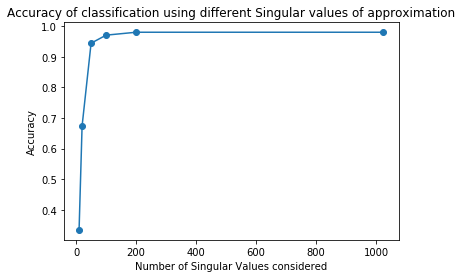

In [21]:
plt.plot(svd, Acc, marker='o')
plt.xlabel("Number of Singular Values considered")
plt.ylabel("Accuracy")
plt.title("Accuracy of classification using different Singular values of approximation")
plt.show()

In [30]:
# Creating the Place Holders

X_20 = tf.placeholder(tf.float32, shape = [None, 784])

Y_true_20 = tf.placeholder(tf.float32, shape = [None, 10])

In [31]:
U1_red = tf.Variable(U1[:, :20])
U2_red = tf.Variable(U2[:, :20])
U3_red = tf.Variable(U3[:, :20])
U4_red = tf.Variable(U4[:, :20])
U5_red = tf.Variable(U5[:, :20])

In [32]:
SV1 = tf.matmul(tf.Variable(S1_diag[:20, :20]), tf.Variable(V1_trans[:20, :]))
SV2 = tf.matmul(tf.Variable(S2_diag[:20, :20]), tf.Variable(V2_trans[:20, :]))
SV3 = tf.matmul(tf.Variable(S3_diag[:20, :20]), tf.Variable(V3_trans[:20, :]))
SV4 = tf.matmul(tf.Variable(S4_diag[:20, :20]), tf.Variable(V4_trans[:20, :]))
SV5 = tf.matmul(tf.Variable(S5_diag[:20, :20]), tf.Variable(V5_trans[:20, :]))

In [33]:
L11 = tf.matmul(X_20, U1_red)
L12 = tf.nn.relu(tf.matmul(L11, SV1) + b1)

L21 = tf.matmul(L12, U2_red)
L22 = tf.nn.relu(tf.matmul(L21, SV2) + b2)

L31 = tf.matmul(L22, U3_red)
L32 = tf.nn.relu(tf.matmul(L31, SV3) + b3)

L41 = tf.matmul(L32, U4_red)
L42 = tf.nn.relu(tf.matmul(L41, SV4) + b4)

L51 = tf.matmul(L42, U5_red)
L52 = tf.nn.relu(tf.matmul(L51, SV5) + b5)

Y_logits_20 = tf.matmul(L52, W6) + b6
Y_pred_20 = tf.nn.softmax(Y_logits_20)

In [34]:
# Defining the Loss Function

cross_entropy_20 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y_logits_20, labels = Y_true_20))

In [35]:
# Defining the optimizer function
 
train_20 = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cross_entropy_20)

In [36]:
# Calculating accuracy of trained model

accuracy_20 = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y_pred_20, 1), tf.argmax(Y_true_20, 1)), tf.float32))

In [37]:
epochs = 2000
sess.run(tf.global_variables_initializer())    
for i in range(epochs + 1):
    batch_X , batch_Y = mnist.train.next_batch(256)

    sess.run(train_20, feed_dict={X_20: batch_X, Y_true_20: batch_Y})

    if i%500 == 0:
        acc_trn, loss_trn = sess.run([accuracy_20, cross_entropy_20], feed_dict={X_20: batch_X, Y_true_20: batch_Y})

        acc_tst, loss_tst = sess.run([accuracy_20, cross_entropy_20], feed_dict={X_20: mnist.test.images, Y_true_20: mnist.test.labels})

        print("Currently on Iteration # {}".format(i))
        print("Training Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_trn*100, loss_trn*100) )
        print("Test Set Accuracy and Loss: Accuracy = {}, Loss = {}".format(acc_tst*100, loss_tst*100))
        print("\n")

Currently on Iteration # 0
Training Set Accuracy and Loss: Accuracy = 15.625, Loss = 227.30181217193604
Test Set Accuracy and Loss: Accuracy = 11.180000007152557, Loss = 229.17683124542236


Currently on Iteration # 500
Training Set Accuracy and Loss: Accuracy = 97.265625, Loss = 11.268378794193268
Test Set Accuracy and Loss: Accuracy = 95.41000127792358, Loss = 16.48366004228592


Currently on Iteration # 1000
Training Set Accuracy and Loss: Accuracy = 99.609375, Loss = 4.3094199150800705
Test Set Accuracy and Loss: Accuracy = 96.35999798774719, Loss = 13.19378912448883


Currently on Iteration # 1500
Training Set Accuracy and Loss: Accuracy = 98.828125, Loss = 5.6985314935445786
Test Set Accuracy and Loss: Accuracy = 96.88000082969666, Loss = 12.71466463804245


Currently on Iteration # 2000
Training Set Accuracy and Loss: Accuracy = 98.4375, Loss = 3.2295145094394684
Test Set Accuracy and Loss: Accuracy = 97.26999998092651, Loss = 10.542822629213333


